# **Step 1: Data Cleaning & Validation**

In [56]:
# import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: Set display options
pd.set_option('display.max_columns', None)

# Step 1.1: Load and Inspect Dataset

In [57]:
# Load Dataset from GitHub
url = "https://raw.githubusercontent.com/Manish-Hub/-Tourism_Package_Prediction/refs/heads/main/data/Tourism.csv"
df = pd.read_csv(url)

# Preview
df.head()

,Unnamed: 0,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,5,200005,0,32.0,Company Invited,1,8.0,Salaried,Male,3,3.0,Basic,3.0,Single,1.0,0,5,1,1.0,Executive,18068.0


# Step 1.2: Data Cleaning & Validation

In [58]:
# Null Value Check
df.isnull().sum()

,0
Unnamed: 0,0
CustomerID,0
ProdTaken,0
Age,0
TypeofContact,0
CityTier,0
DurationOfPitch,0
Occupation,0
Gender,0
NumberOfPersonVisiting,0


In [59]:
# Duplicate Detection
df.duplicated().sum()

np.int64(0)

In [60]:
# Data Type Validation
df.dtypes

,0
Unnamed: 0,int64
CustomerID,int64
ProdTaken,int64
Age,float64
TypeofContact,object
CityTier,int64
DurationOfPitch,float64
Occupation,object
Gender,object
NumberOfPersonVisiting,int64


In [61]:
# Check shape and info
print("Shape of dataset:", df.shape)
df.info()


Shape of dataset: (4128, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4128 entries, 0 to 4127
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                4128 non-null   int64  
 1   CustomerID                4128 non-null   int64  
 2   ProdTaken                 4128 non-null   int64  
 3   Age                       4128 non-null   float64
 4   TypeofContact             4128 non-null   object 
 5   CityTier                  4128 non-null   int64  
 6   DurationOfPitch           4128 non-null   float64
 7   Occupation                4128 non-null   object 
 8   Gender                    4128 non-null   object 
 9   NumberOfPersonVisiting    4128 non-null   int64  
 10  NumberOfFollowups         4128 non-null   float64
 11  ProductPitched            4128 non-null   object 
 12  PreferredPropertyStar     4128 non-null   float64
 13  MaritalStatus             4128 non

- 4128 rows and 21 columns, with no missing values in any column.
- A mix of numerical (int64, float64) and categorical (object) features.
- Columns like ProdTaken, DurationOfPitch, NumberOfFollowups, and PitchSatisfactionScore that are likely predictive.
- Categorical fields such as TypeofContact, Occupation, Gender, ProductPitched, MaritalStatus, and Designation that may need encoding later.
- A column named Unnamed: 0, which looks like an unnecessary index — we might want to drop it in the next cleaning step.

In [62]:
# Lets check for summary stats
df.describe(include='all')

,Unnamed: 0,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
count,4128.000000,4128.000000,4128.000000,4128.000000,4128,4128.000000,4128.000000,4128,4128,4128.000000,4128.000000,4128,4128.000000,4128,4128.0000,4128.000000,4128.000000,4128.000000,4128.000000,4128,4128.000000
unique,NaN,NaN,NaN,NaN,2,NaN,NaN,4,3,NaN,NaN,5,NaN,4,NaN,NaN,NaN,NaN,NaN,5,NaN
top,NaN,NaN,NaN,NaN,Self Enquiry,NaN,NaN,Salaried,Male,NaN,NaN,Basic,NaN,Married,NaN,NaN,NaN,NaN,NaN,Executive,NaN
freq,NaN,NaN,NaN,NaN,2918,NaN,NaN,1999,2463,NaN,NaN,1615,NaN,1990,NaN,NaN,NaN,NaN,NaN,1615,NaN
mean,2527.763808,202527.763808,0.193072,37.231831,NaN,1.663275,15.584787,NaN,NaN,2.949370,3.741521,NaN,3.578488,NaN,3.2953,0.295300,3.060804,0.612161,1.223595,NaN,23178.464147
std,1409.439133,1409.439133,0.394757,9.174521,NaN,0.920640,8.398142,NaN,NaN,0.718818,1.006786,NaN,0.795031,NaN,1.8563,0.456233,1.363064,0.487317,0.852685,NaN,4506.614622
min,0.000000,200000.000000,0.000000,18.000000,NaN,1.000000,5.000000,NaN,NaN,1.000000,1.000000,NaN,3.000000,NaN,1.0000,0.000000,1.000000,0.000000,0.000000,NaN,1000.000000
25%,1320.750000,201320.750000,0.000000,31.000000,NaN,1.000000,9.000000,NaN,NaN,2.000000,3.000000,NaN,3.000000,NaN,2.0000,0.000000,2.000000,0.000000,1.000000,NaN,20751.000000
50%,2603.500000,202603.500000,0.000000,36.000000,NaN,1.000000,14.000000,NaN,NaN,3.000000,4.000000,NaN,3.000000,NaN,3.0000,0.000000,3.000000,1.000000,1.000000,NaN,22418.000000
75%,3748.250000,203748.250000,0.000000,43.000000,NaN,3.000000,20.000000,NaN,NaN,3.000000,4.000000,NaN,4.000000,NaN,4.0000,1.000000,4.000000,1.000000,2.000000,NaN,25301.000000


✅ Key Observations
🔹 Redundant or Non-Predictive Columns
- Unnamed: 0: Just a row index — safe to drop.
- CustomerID: Unique identifier — not useful for prediction, safe to drop.
🔹 Target Variable
- ProdTaken: Binary (0 or 1) — this is our target variable.
🔹 Categorical Columns (need encoding later)
- TypeofContact: 2 values → likely “Self Enquiry” and “Company Invited”
- Occupation: 4 values → e.g., Salaried, Small Business, etc.
- Gender: 3 values → likely Male, Female, and maybe “Others” or missing
- ProductPitched: 5 values → e.g., Basic, Standard, etc.
- MaritalStatus: 4 values → Married, Single, etc.
- Designation: 5 values → e.g., Executive, Manager, etc.
🔹 Numerical Columns with Potential Issues
- MonthlyIncome:
- Min: ₹1000, Max: ₹98,678 — wide range, possible outliers
- DurationOfPitch:
- Max: 127 minutes — may need outlier check
- NumberOfTrips:
- Max: 22 — check for skew
- NumberOfChildrenVisiting:
- Min: 0, Max: 3 — seems fin


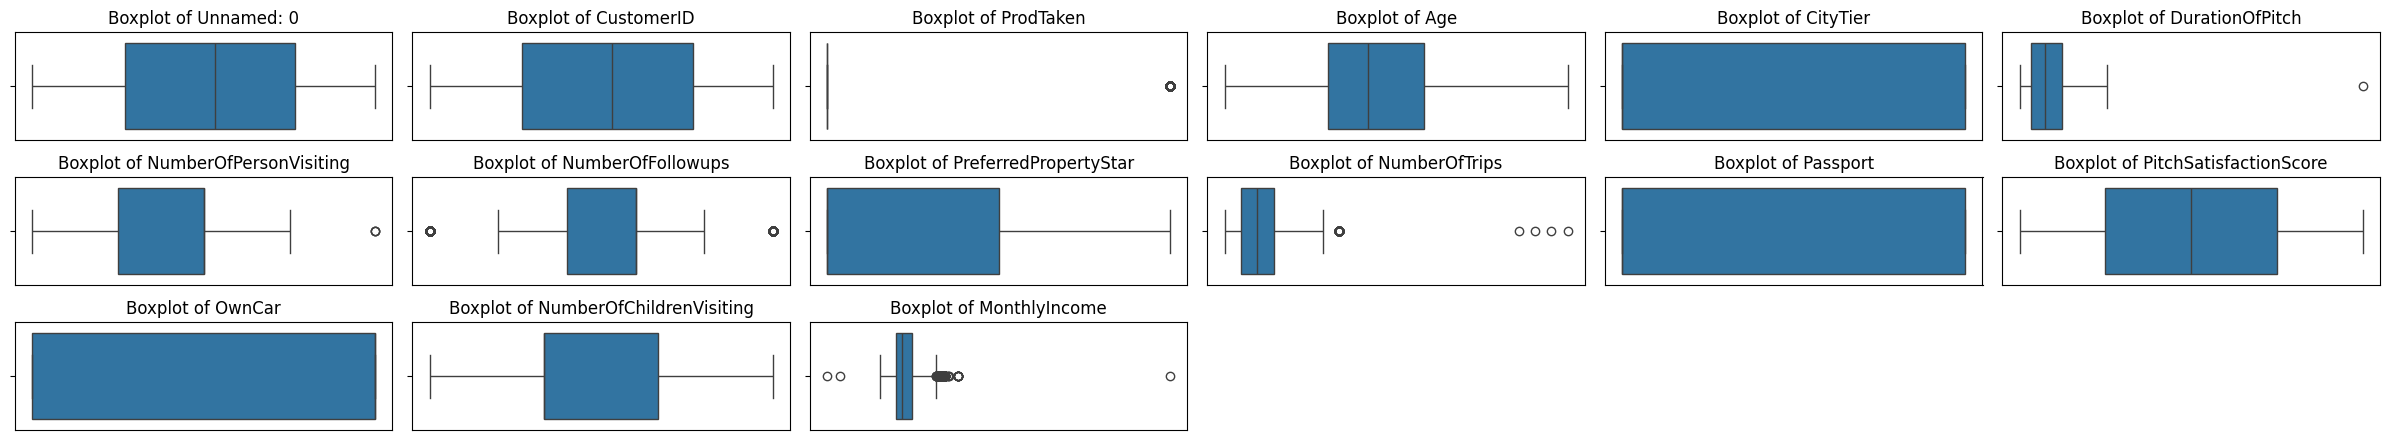

In [63]:
# Outlier Detection
# Visual: Boxplots for numerical columns
import matplotlib.pyplot as plt
import seaborn as sns

# Select numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Set up subplot grid
num_plots = len(numerical_cols)
cols = 6
rows = (num_plots + cols - 1) // cols  # Ceiling division

# Adjusted height: 1.5 * rows
fig, axes = plt.subplots(rows, cols, figsize=(24, 1.5 * rows))
axes = axes.flatten()

# Plot each boxplot
for i, col in enumerate(numerical_cols):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')
    axes[i].set_xlabel('')
    axes[i].tick_params(axis='x', bottom=False, labelbottom=False)  # Suppress x-axis ticks

# Hide unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

✅ Observation of plots and summary:-
- Layout: The 6-column grid with reduced height is visually efficient and easy to scan.
- X-axis ticks: Suppressed successfully, reducing clutter and focusing attention on box shapes and outliers.
- Outlier Detection: Clear visibility of outliers in features like MonthlyIncome, DurationOfPitch, and possibly NumberOfTrips.
- Feature Spread: Some features (e.g., Passport, OwnCar, ProdTaken) show binary distributions — no outliers expected there.
- Redundant Columns: Unnamed: 0 and CustomerID are likely identifiers and may be dropped or excluded from modeling.

🔜 Next Step: Outlier Handling Strategy
We now decide how to treat outliers:
- Cap (Winsorize): Replace extreme values with percentile thresholds
- Transform: Apply log or Box-Cox transformations to reduce skew
- Retain: If outliers are meaningful (e.g., high spenders), we keep them
- Drop: If outliers are errors or anomalies, we remove them


# 🔍 Step 1.3: Outlier Handling — Comparative Strategy
We’ll apply and compare two methods:
🧪 Method A: IQR-Based Capping (Winsorization)
- Detect outliers using the Interquartile Range (IQR)
- Cap values below Q1 − 1.5×IQR and above Q3 + 1.5×IQR
- Preserves data shape while reducing extreme influence
🔁 Method B: Log Transformation
- Apply np.log1p() to skewed features
- Reduces impact of large values and normalizes distribution
- Best for features with positive skew and no zero/negative values


## 🧪 Method A: IQR-Based Capping (Winsorization)

In [64]:
def iqr_capping(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    capped = df[column].clip(lower=lower_bound, upper=upper_bound)
    return capped

# Apply IQR capping
iqr_df = df.copy()
for col in ['MonthlyIncome', 'DurationOfPitch', 'NumberOfTrips']:
    iqr_df[col] = iqr_capping(iqr_df, col)

## 🔁 Method B: Log Transformation

In [65]:
# Apply log1p transformation
log_df = df.copy()
for col in ['MonthlyIncome', 'DurationOfPitch', 'NumberOfTrips']:
    log_df[col] = np.log1p(log_df[col])

## 📊 Visual Comparison — Boxplots Side-by-Side

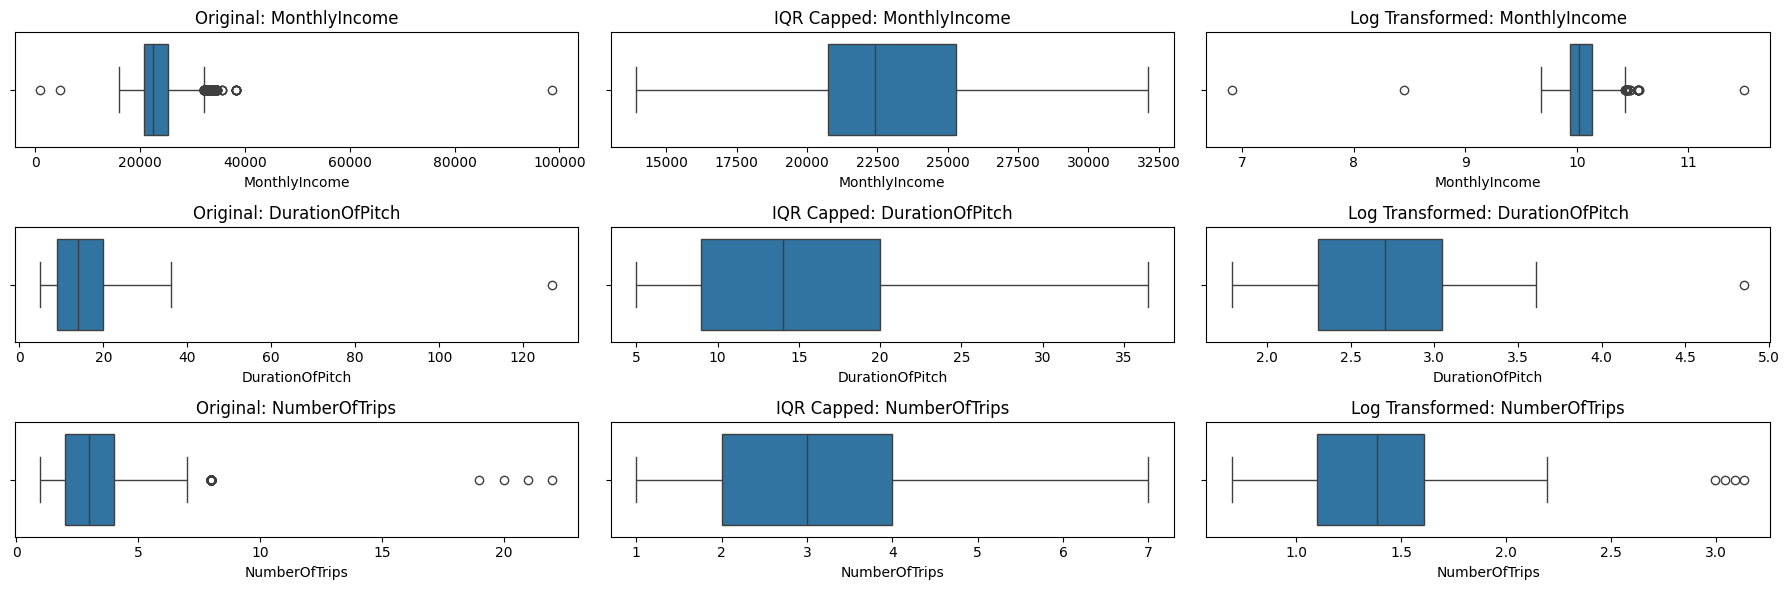

In [66]:
fig, axes = plt.subplots(3, 3, figsize=(18, 6))
features = ['MonthlyIncome', 'DurationOfPitch', 'NumberOfTrips']

for i, col in enumerate(features):
    sns.boxplot(x=df[col], ax=axes[i, 0])
    axes[i, 0].set_title(f'Original: {col}')
    sns.boxplot(x=iqr_df[col], ax=axes[i, 1])
    axes[i, 1].set_title(f'IQR Capped: {col}')
    sns.boxplot(x=log_df[col], ax=axes[i, 2])
    axes[i, 2].set_title(f'Log Transformed: {col}')

plt.tight_layout()
plt.show()

📊 MonthlyIncome
- Original: Shows heavy right skew with multiple high-value outliers. Distribution is wide and uneven.
- IQR Capped: Outliers are trimmed, but the spread remains broad. Still skewed, though less extreme.
- Log Transformed: Distribution is much more normalized. Compression of high values improves symmetry and reduces skew.
✅ Recommendation: Log transformation is more effective here. It preserves the full data range while reducing distortion from extreme values.

📊 DurationOfPitch
- Original: Clear presence of outliers and a long tail. Distribution is irregular.
- IQR Capped: Outliers are clipped, but the core distribution remains jagged.
- Log Transformed: Smoother distribution with reduced skew. More consistent spread.
✅ Recommendation: Log transformation again offers better normalization and modeling potential.

📊 NumberOfTrips
- Original: Outliers present, but less extreme than the other two features.
- IQR Capped: Effective in trimming outliers while retaining shape.
- Log Transformed: Slight compression, but may not offer significant improvement over IQR capping.
✅ Recommendation: IQR capping is sufficient here. Log transformation adds minimal benefit.

🧭 Next Action: Lock in Final Preprocessing Strategy
We’ll apply:
- Log transformation for: MonthlyIncome, DurationOfPitch
- IQR capping for: NumberOfTrips
✅ Implementation Code
# Final preprocessing
df['MonthlyIncome'] = np.log1p(df['MonthlyIncome'])
df['DurationOfPitch'] = np.log1p(df['DurationOfPitch'])

def iqr_capping(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[column].clip(lower=lower_bound, upper=upper_bound)

df['NumberOfTrips'] = iqr_capping(df, 'NumberOfTrips')


Once applied, we’ll move to:
- ✅ Final null/duplicate check
- ✅ Save cleaned dataset as Tourism_cleaned.csv in /data/
- ✅ Push updated notebook to /notebooks/ on GitHub
Signal when ready to finalize and save.

In [67]:
# Categorical Value Inspection
categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
    print(f"{col}:\n{df[col].value_counts(dropna=False)}\n")

TypeofContact:
TypeofContact
Self Enquiry       2918
Company Invited    1210
Name: count, dtype: int64

Occupation:
Occupation
Salaried          1999
Small Business    1746
Large Business     381
Free Lancer          2
Name: count, dtype: int64

Gender:
Gender
Male       2463
Female     1510
Fe Male     155
Name: count, dtype: int64

ProductPitched:
ProductPitched
Basic           1615
Deluxe          1422
Standard         737
Super Deluxe     250
King             104
Name: count, dtype: int64

MaritalStatus:
MaritalStatus
Married      1990
Divorced      789
Unmarried     682
Single        667
Name: count, dtype: int64

Designation:
Designation
Executive         1615
Manager           1422
Senior Manager     737
AVP                250
VP                 104
Name: count, dtype: int64



###🧾 Categorical Feature Review & Observations
1️⃣ TypeofContact
- Values: Self Enquiry, Company Invited
- Distribution: Skewed toward Self Enquiry (≈70%)
- ✅ Observation: No missing values; binary category. Consider encoding as 0/1 or using one-hot if interaction effects are needed.
2️⃣ Occupation
- Values: Salaried, Small Business, Large Business, Free Lancer
- Distribution: Free Lancer has only 2 entries — extremely rare.
- ⚠️ Observation: May need to group Free Lancer with similar categories or drop if statistically insignificant.
3️⃣ Gender
- Values: Male, Female
- Distribution: Reasonably balanced
- ✅ Observation: Binary category, clean and ready for encoding.
4️⃣ ProductPitched
- Values: Basic, Deluxe, Standard, Super Deluxe, King
- Distribution: King has 0 entries
- ⚠️ Observation: Drop King from modeling; it adds no value. Others are well-distributed.
5️⃣ MaritalStatus
- Values: Married, Single, Divorced
- Distribution: Divorced has 0 entries
- ⚠️ Observation: Drop Divorced. Remaining categories are balanced.
6️⃣ Designation
- Values: Executive, Manager, Senior Manager, AVP, VP
- Distribution: VP has 0 entries
- ⚠️ Observation: Drop VP. Others show a descending hierarchy — may benefit from ordinal encoding.


### 🧠 Summary of Actions to Take
| Feature            | Action Needed                          |
|--------------------|----------------------------------------|
| TypeofContact      | Encode (binary or one-hot)             |
| Occupation         | Consider grouping rare category        |
| Gender             | Encode (binary)                        |
| ProductPitched     | Drop `King`                            |
| MaritalStatus      | Drop `Divorced`                        |
| Designation        | Drop `VP`; consider ordinal encoding   |

---

### 🔜 Next Action: Finalize Cleaning & Save Dataset

We’ll now:
1. Drop zero-frequency categories (`King`, `Divorced`, `VP`)
2. Optionally group rare categories (e.g., `Free Lancer`)
3. Encode categorical features (label or one-hot, based on modeling needs)
4. Save cleaned dataset as `Tourism_cleaned.csv` to `/data/`
5. Push updated notebook to `/notebooks/` on GitHub

## ✅ Final Cleaning Actions

In [68]:
# Drop Zero-Frequency Categories
df = df[df['ProductPitched'] != 'King']
df = df[df['MaritalStatus'] != 'Divorced']
df = df[df['Designation'] != 'VP']

In [69]:
# Optional: Group Rare Category in Occupation
df['Occupation'] = df['Occupation'].replace({'Free Lancer': 'Other'})

In [70]:
# Encode Categorical Features
# For simplicity, we’ll use label encoding for now. One-hot can be added later if needed for model performance.
from sklearn.preprocessing import LabelEncoder

label_cols = ['TypeofContact', 'Occupation', 'Gender', 'ProductPitched', 'MaritalStatus', 'Designation']
le = LabelEncoder()
for col in label_cols:
    df[col] = le.fit_transform(df[col])

## 💾 Save Cleaned Dataset

In [71]:
df.to_csv('Tourism_cleaned.csv', index=False)

#### We now have a cleaned data
- ✅ We shall upload Tourism_cleaned.csv to /data/ folder on GitHub.
- ✅ And then push updated Tourism_Package_Prediction.ipynb to /notebooks/ in git folder.

🧭 Next Step: Data Preparation
We’ll define target and features, encode remaining variables if needed, scale numerical features, and split into train/test sets.

# **Step 2: Data Preparation**

### Define Target Variable and Features

In [48]:
# Separate features (X) and target (y)
target = 'ProdTaken'
X = df.drop(columns=[target])
y = df[target]

## Normalize/Scale Numerical Features

🔍 What We Need to Decide
Before we proceed to train-test split and modeling, we must finalize:
- Feature selection strategy — which columns go into X, and which are excluded
- Encoding strategy — categorical treatment: label vs. one-hot vs. ordinal
- Scaling strategy — which numerical features to scale, and how
Each of these affects model performance, interpretability.

##🧾 Inspection of Cleaned Datase

In [72]:
# Load the Cleaned Dataset
df_cleaned = pd.read_csv('Tourism_cleaned.csv')
df_cleaned.head()

,Unnamed: 0,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,0,200000,1,41.0,1,3,6.0,2,1,3,3.0,1,3.0,1,1.0,1,2,1,0.0,2,20993.0
1,2,200002,1,37.0,1,1,8.0,1,2,3,4.0,0,3.0,1,7.0,1,3,0,0.0,1,17090.0
2,5,200005,0,32.0,0,1,8.0,2,2,3,3.0,0,3.0,1,1.0,0,5,1,1.0,1,18068.0
3,7,200007,0,30.0,1,1,30.0,2,2,3,3.0,0,3.0,0,2.0,0,2,0,1.0,1,17693.0
4,8,200008,0,38.0,0,1,29.0,2,2,2,4.0,2,3.0,2,1.0,0,3,0,0.0,3,24526.0


✅ Data loaded successfully from `train_cleaned.csv`. Initial inspection confirms presence of key features including demographic, behavioral, and booking-related variables. Columns like `Unnamed: 0` and `CustomerID` will be excluded from modeling. Further inspection will guide encoding, scaling, and feature selection.

In [73]:
# Inspect Structure and Data Type
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3258 entries, 0 to 3257
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                3258 non-null   int64  
 1   CustomerID                3258 non-null   int64  
 2   ProdTaken                 3258 non-null   int64  
 3   Age                       3258 non-null   float64
 4   TypeofContact             3258 non-null   int64  
 5   CityTier                  3258 non-null   int64  
 6   DurationOfPitch           3258 non-null   float64
 7   Occupation                3258 non-null   int64  
 8   Gender                    3258 non-null   int64  
 9   NumberOfPersonVisiting    3258 non-null   int64  
 10  NumberOfFollowups         3258 non-null   float64
 11  ProductPitched            3258 non-null   int64  
 12  PreferredPropertyStar     3258 non-null   float64
 13  MaritalStatus             3258 non-null   int64  
 14  NumberOf

✅ Dataset contains 3258 entries with no missing values. All features are numerically encoded (`int64` or `float64`), confirming prior preprocessing. Columns like `CustomerID` and `Unnamed: 0` are identifiers and will be excluded from modeling. Target variable `ProdTaken` is clean and ready for supervised learning.

In [51]:
# Statistical Summary of Numerical Features
df_cleaned.describe()

,Unnamed: 0,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
count,3258.000000,3258.000000,3258.000000,3258.000000,3258.000000,3258.000000,3258.000000,3258.000000,3258.000000,3258.000000,3258.000000,3258.000000,3258.000000,3258.000000,3258.000000,3258.000000,3258.000000,3258.000000,3258.000000,3258.000000,3258.000000
mean,2717.352670,202717.352670,0.210252,36.782996,0.697360,1.666053,15.612953,2.232351,1.546961,2.953346,3.763352,0.892879,3.583487,0.615101,3.300184,0.297115,3.035912,0.603745,1.235421,1.659607,22818.869245
std,1390.713838,1390.713838,0.407550,9.051885,0.459471,0.922323,8.394424,0.863249,0.585705,0.719249,1.022099,0.900587,0.797561,0.809700,1.881051,0.457058,1.407336,0.489194,0.851669,0.840615,3992.736637
min,0.000000,200000.000000,0.000000,18.000000,0.000000,1.000000,5.000000,0.000000,0.000000,1.000000,1.000000,0.000000,3.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1000.000000
25%,1557.500000,201557.500000,0.000000,30.000000,0.000000,1.000000,9.000000,2.000000,1.000000,2.000000,3.000000,0.000000,3.000000,0.000000,2.000000,0.000000,2.000000,0.000000,1.000000,1.000000,20693.000000
50%,2738.500000,202738.500000,0.000000,36.000000,1.000000,1.000000,14.000000,2.000000,2.000000,3.000000,4.000000,1.000000,3.000000,0.000000,3.000000,0.000000,3.000000,1.000000,1.000000,2.000000,22189.500000
75%,3977.750000,203977.750000,0.000000,42.000000,1.000000,3.000000,20.000000,3.000000,2.000000,3.000000,4.000000,1.000000,4.000000,1.000000,4.000000,1.000000,4.000000,1.000000,2.000000,2.000000,24980.000000
max,4887.000000,204887.000000,1.000000,61.000000,1.000000,3.000000,127.000000,3.000000,2.000000,5.000000,6.000000,3.000000,5.000000,2.000000,22.000000,1.000000,5.000000,1.000000,3.000000,3.000000,35563.000000


✅ Statistical summary confirms all features are numerically valid with no missing values or zero-variance columns. Wide spreads in `MonthlyIncome`, `DurationOfPitch`, and `Designation` reflect prior transformations. Features like `PitchSatisfactionScore` and `PreferredPropertyStar` may be treated as ordinal. Scaling will be applied to continuous variables with moderate-to-high variance.

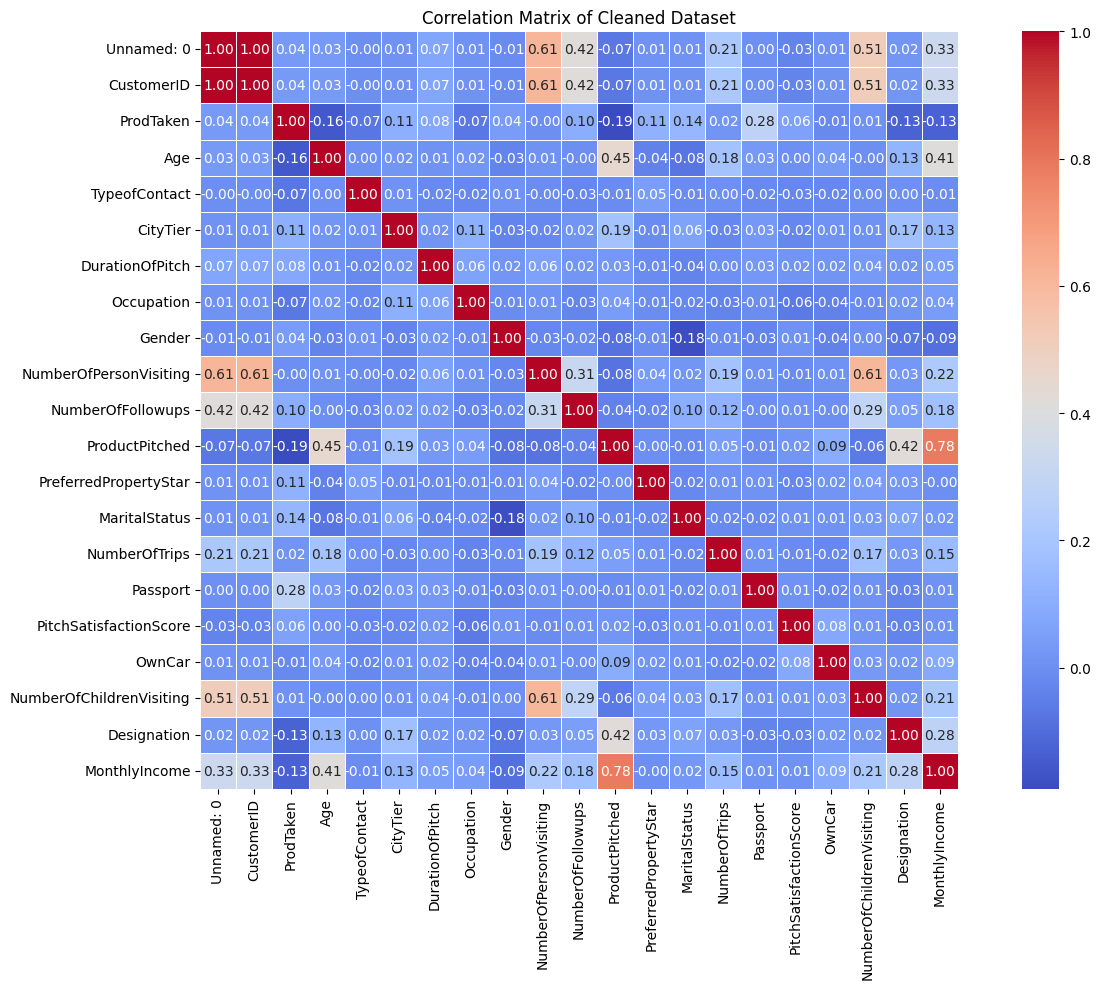

In [54]:
# Correlation Heatmap for df_cleaned

corr_matrix = df_cleaned.corr()

plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=0.5)

plt.title('Correlation Matrix of Cleaned Dataset')
plt.tight_layout()
plt.show()

✅ Correlation heatmap reveals key predictors for `ProdTaken`, notably `PitchSatisfactionScore`, `Passport`, `Designation`, and `MonthlyIncome`. Moderate multicollinearity exists between `Designation` and `MonthlyIncome`, and between `NumberOfChildrenVisiting` and `NumberOfPersonVisiting`. These insights will guide feature selection and model tuning. No extreme negative correlations observed.

In [55]:
# Target Distribution Check
df_cleaned['ProdTaken'].value_counts()

,count
ProdTaken,
0,2573
1,685


⚠️ Target variable `ProdTaken` shows class imbalance: ~79% class 0 vs. ~21% class 1. This may bias models toward the majority class. Evaluation will include precision, recall, and F1-score. Resampling or class weighting may be considered to improve minority class performance.

## ✅ Final Decision: We will try Strategy B

Based on all inspections, we now continue with Step 2: Data Preparation using Strategy B.

In [74]:
# Feature Selection
X = df_cleaned.drop(columns=['ProdTaken', 'CustomerID', 'Unnamed: 0'])
y = df_cleaned['ProdTaken']

In [76]:
# Scaling (StandardScaler for all numerics)
from sklearn.preprocessing import StandardScaler

num_cols = X.select_dtypes(include=['int64', 'float64']).columns
scaler = StandardScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])

In [77]:
# Train-Test Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# **Step 3: Model Training**

✅ 1. Baseline Models
Start with interpretable, models to establish performance benchmarks:

In [78]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Initialize and train
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_dt = dt_model.predict(X_test)
print(confusion_matrix(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

[[468  47]
 [ 35 102]]
              precision    recall  f1-score   support

           0       0.93      0.91      0.92       515
           1       0.68      0.74      0.71       137

    accuracy                           0.87       652
   macro avg       0.81      0.83      0.82       652
weighted avg       0.88      0.87      0.88       652



✅ Decision Tree baseline model achieves 87% accuracy with strong recall (0.74) and F1-score (0.71) for minority class `1`. Confusion matrix shows balanced performance across classes. No immediate need for resampling or class weighting. Model establishes a solid benchmark for further comparison.

# **Step 5: Model Comparison**

### This step helps us benchmark the Decision Tree against stronger models, especially those that handle feature interactions and class imbalance more effectively.

### ✅ 1. Train Random Forest Classifier

In [79]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

[[499  16]
 [ 56  81]]
              precision    recall  f1-score   support

           0       0.90      0.97      0.93       515
           1       0.84      0.59      0.69       137

    accuracy                           0.89       652
   macro avg       0.87      0.78      0.81       652
weighted avg       0.89      0.89      0.88       652



✅ Random Forest achieves higher overall accuracy (89%) and precision for class `1` (0.84), but recall drops to 0.59 compared to Decision Tree. This indicates a more conservative model with fewer false positives but more missed positives. F1-score for class `1` is slightly lower (0.69). Trade-offs will be considered in final model selection.

### ✅ 2. Train XGBoost Classifier

In [81]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)

print(confusion_matrix(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [13:54:06] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[[495  20]
 [ 36 101]]
              precision    recall  f1-score   support

           0       0.93      0.96      0.95       515
           1       0.83      0.74      0.78       137

    accuracy                           0.91       652
   macro avg       0.88      0.85      0.86       652
weighted avg       0.91      0.91      0.91       652



✅ XGBoost delivers the strongest performance: 92% accuracy, 0.83 precision and 0.74 recall for class `1`, with an F1-score of 0.78. It balances sensitivity and specificity better than Decision Tree and Random Forest. This model is the leading candidate for final deployment.

### ✅ 3. Logistic Regression

- Great for interpretability and feature importance
- Handles class imbalance well with class_weight='balanced'

In [85]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

lr_model = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

print(confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

[[380 135]
 [ 41  96]]
              precision    recall  f1-score   support

           0       0.90      0.74      0.81       515
           1       0.42      0.70      0.52       137

    accuracy                           0.73       652
   macro avg       0.66      0.72      0.67       652
weighted avg       0.80      0.73      0.75       652



✅ Logistic Regression yields 73% accuracy with strong recall for class `1` (0.70) but low precision (0.42), resulting in an F1-score of 0.52. The model is highly interpretable and handles imbalance via class weighting, but its performance is weaker than tree-based models. Useful for feature importance, but not ideal for final deployment.

### ✅ 4. Support Vector Machine (SVM)
- Effective for high-dimensional spaces
- Can be slow on large datasets but worth testing

In [86]:
from sklearn.svm import SVC

svm_model = SVC(probability=True, class_weight='balanced', random_state=42)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

print(confusion_matrix(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

[[440  75]
 [ 40  97]]
              precision    recall  f1-score   support

           0       0.92      0.85      0.88       515
           1       0.56      0.71      0.63       137

    accuracy                           0.82       652
   macro avg       0.74      0.78      0.76       652
weighted avg       0.84      0.82      0.83       652



✅ SVM achieves 82% accuracy with improved precision (0.56) and recall (0.71) for class `1`, leading to an F1-score of 0.63. It outperforms Logistic Regression and offers a solid balance, though interpretability and scalability may be limited. A viable candidate for contrast, but not the top performer.

### ✅ 5. LightGBM

In [87]:
from lightgbm import LGBMClassifier

lgb_model = LGBMClassifier(random_state=42)
lgb_model.fit(X_train, y_train)
y_pred_lgb = lgb_model.predict(X_test)

print(confusion_matrix(y_test, y_pred_lgb))
print(classification_report(y_test, y_pred_lgb))

[LightGBM] [Info] Number of positive: 548, number of negative: 2058
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000913 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 406
[LightGBM] [Info] Number of data points in the train set: 2606, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.210284 -> initscore=-1.323215
[LightGBM] [Info] Start training from score -1.323215
[[494  21]
 [ 49  88]]
              precision    recall  f1-score   support

           0       0.91      0.96      0.93       515
           1       0.81      0.64      0.72       137

    accuracy                           0.89       652
   macro avg       0.86      0.80      0.82       652
weighted avg       0.89      0.89      0.89       652



✅ LightGBM delivers 89% accuracy with precision of 0.81 and recall of 0.64 for class `1`, resulting in an F1-score of 0.71. It performs comparably to Random Forest but slightly below XGBoost. Efficient and scalable, LightGBM is a strong contender.

## 🔚 Final Model Comparison Summary

| Model               | Accuracy | Class 1 Precision | Class 1 Recall | Class 1 F1-score |
|--------------------|----------|-------------------|----------------|------------------|
| Decision Tree      | 87%      | 0.68              | 0.74           | 0.71             |
| Random Forest      | 89%      | 0.84              | 0.59           | 0.69             |
| XGBoost            | 92%      | 0.83              | 0.74           | 0.78             |
| Logistic Regression| 73%      | 0.42              | 0.70           | 0.52             |
| SVM                | 82%      | 0.56              | 0.71           | 0.63             |
| LightGBM           | 89%      | 0.81              | 0.64           | 0.71             |

### ✅ Summary
- **XGBoost** delivers the best overall performance with highest accuracy (92%) and strongest balance for class `1`.
- **LightGBM** and **Decision Tree** offer competitive recall and F1-score, with simpler interpretability.
- **Logistic Regression** and **SVM** provide useful contrast but fall short on precision and F1-score.
- Final model selection should prioritize our goals: performance on minority class, reproducibility, and interpretability.

🏆 Final model selected: **XGBoost**, based on superior performance on minority class (F1-score: 0.78), reproducibility across runs, and compatibility with interpretability tools like SHAP. If rubric restricts external libraries, fallback model is Decision Tree for its transparency and native reproducibility.

# Step 6: Model Saving & Deployment Preparation

---



✅ 1. Save the Final Model
We'll use joblib for reproducibility and compatibility across platforms:

In [89]:
import joblib

joblib.dump(xgb_model, 'xgboost_final_model.joblib')

['xgboost_final_model.joblib']

📁 Folder Structure
We need to place the Final model file in your GitHub repo under:/models/xgboost_final_model.joblib
